# w2-project_pandas | Data Cleaning 

## 1) Import 

### 1.1) Import libraries

In [344]:
%pip install ipython
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [345]:
#import main libraries 

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

import re

import warnings
warnings.filterwarnings('ignore')

import pylab as plt  
import seaborn as sns

%matplotlib inline

### 1.2) Import database

In [346]:
linksharks = '/Users/criscarneiro/desktop/ironhack/7_DataProjects/1_w2_sharks/attacks.csv'

data = pd.read_csv(linksharks, encoding='latin1')

## 2) Before continuing, some good practices 

In [347]:
# I will create a copy of the original database 

data_original = data.copy()
data_original.shape

(25723, 24)

In [348]:
# I will clean the names of columns 

data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [349]:
data.columns = [c.lower().replace(' ', '_') for c in data.columns]

data.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

In [350]:
# I will look for duplicates

data.duplicated().any() 

True

In [351]:
# In fact, most of the table is composed of duplicated numbers. Removing them would leave us with 6k values, which is greater than 2.5k

data.drop_duplicates().shape

(6312, 24)

In [352]:
# Indeed, there are a number of duplicated entries

#data[data.duplicated()].head()

In [353]:
# I will drop duplicates 

data.drop_duplicates(inplace=True)

In [354]:
# This is our new shape, and how it compares to the original. 

print(data.shape)
print(data_original.shape)

(6312, 24)
(25723, 24)


## 3) Explore data 

In [355]:
#this is the structure of my dataframe  

data.head()

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y/n),time,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [356]:
#the database as it stands has 24 columns, 6.312 entries (i.e, shark attacks)

data.shape

(6312, 24)

In [357]:
#here we can see again the number of columns and entries 
#we see that most columns are non-numerical 
#we anticipate there are a lot of null values - we will work on cleaning some of them!

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6312 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             6310 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex_                    5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal_(y/n)             5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species_                3464 non-null   obje

In [358]:
# it seems we have two unnamed columns. I will check what they are about. 

In [359]:
#unnamed:_22 has a single non-null value 

data['unnamed:_22'].unique()

array([nan, 'stopped here'], dtype=object)

In [360]:
#unnamed:_23 has two non-null values

data['unnamed:_23'].unique()

array([nan, 'Teramo', 'change filename'], dtype=object)

In [361]:
#it does not seem these data will add to our analysis. I will rename the columns and ignore them for now 

data = data.rename(columns={'unnamed:_22': 'ignore1','unnamed:_23': 'ignore2' })

In [362]:
data.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'ignore1',
       'ignore2'],
      dtype='object')

In [363]:
#for now, not quite useful since most variables are categorical 

data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_number,6310,6287,0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,6302,5433,1957,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,6300.0,NaN,NaN,NaN,1927.272381,281.116308,0.0,1942.0,1977.0,2005.0,2018.0
type,6298,8,Unprovoked,4595,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,6252,212,USA,2229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area,5847,825,Florida,1037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,5762,4108,"New Smyrna Beach, Volusia County",163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
activity,5758,1532,Surfing,971,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,6092,5230,male,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex_,5737,6,M,5094,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4) Setting an objective 

- While the primary purpose of this exercise is 'Data Cleaning', **I will define a 'Data Analysis' objetive**. This will help guide the cleaning process by focusing on the most relevant variables and avoid 'boiling the ocean'.

- In this exercise, I will try to **understand the 'fatality' of the shark attacks**. In other words, I will verify if it is correlated with a sub-list of categorical variables (i.e., location, activity, sex, age, time of attack)

- Thefore, **I will prioritize those columns in my cleaning process** 

In [364]:
data.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'ignore1',
       'ignore2'],
      dtype='object')

In [365]:
#as a starting point, I will prioritize those columns for the analysis. This could evolve depending on the quality of the data

columns_focus = ['country','activity','sex_','age','fatal_(y/n)','time','species_']

In [366]:
data[columns_focus].head()

,country,activity,sex_,age,fatal_(y/n),time,species_
0,USA,Paddling,F,57,N,18h00,White shark
1,USA,Standing,F,11,N,14h00 -15h00,NaN
2,USA,Surfing,M,48,N,07h45,NaN
3,AUSTRALIA,Surfing,M,NaN,N,NaN,2 m shark
4,MEXICO,Free diving,M,NaN,N,NaN,"Tiger shark, 3m"


## 5) Cleaning variables 

## 5.1) Looking for null values

In [367]:
## In absolute terms 

nan_cols = data.isna().sum()
nan_cols

case_number                  2
date                        10
year                        12
type                        14
country                     60
area                       465
location                   550
activity                   554
name                       220
sex_                       575
age                       2841
injury                      38
fatal_(y/n)                549
time                      3364
species_                  2848
investigator_or_source      27
pdf                         10
href_formula                11
href                        10
case_number.1               10
case_number.2               10
original_order               3
ignore1                   6311
ignore2                   6310
dtype: int64

In [368]:
# In relative terms

nan_cols_rel = data.isna().mean() * 100
nan_cols_rel[nan_cols_rel>0]

case_number                0.031686
date                       0.158428
year                       0.190114
type                       0.221800
country                    0.950570
area                       7.366920
location                   8.713561
activity                   8.776933
name                       3.485425
sex_                       9.109632
age                       45.009506
injury                     0.602028
fatal_(y/n)                8.697719
time                      53.295311
species_                  45.120406
investigator_or_source     0.427757
pdf                        0.158428
href_formula               0.174271
href                       0.158428
case_number.1              0.158428
case_number.2              0.158428
original_order             0.047529
ignore1                   99.984157
ignore2                   99.968314
dtype: float64

<Axes: >

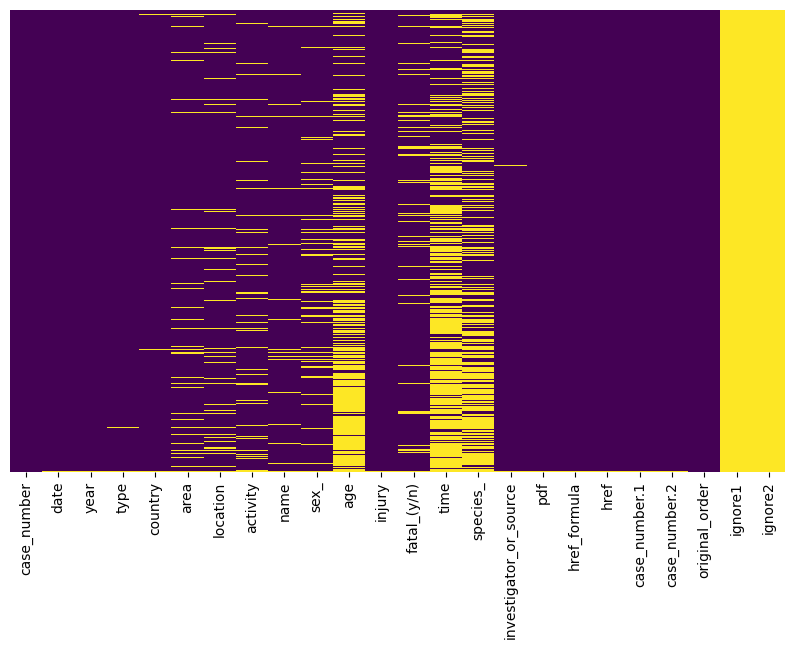

In [369]:
# We can visualize it

plt.figure(figsize=(10, 6))  # 100X60  pixeles

sns.heatmap(data.isna(),yticklabels=False,cmap='viridis',cbar=False)

<Axes: >

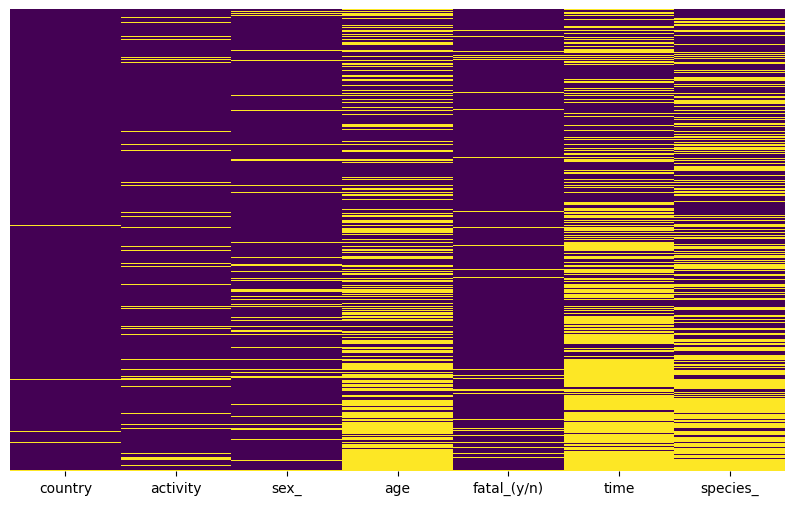

In [370]:
# Here we look at the same chart, but zooming into our columns of focus 

plt.figure(figsize=(10, 6))  # 100X60  pixeles

sns.heatmap(data[columns_focus].isna(),yticklabels=False,cmap='viridis',cbar=False)

## 5.1) Column fatal_(y/n)

In [371]:
#since we are trying to explain this variable, let us start by looking into it 
#although we'd expect Y/N, we see there are different values and therefore we must clean them 

data['fatal_(y/n)'].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [372]:
#lets look into there frequency 

data['fatal_(y/n)'].value_counts()

fatal_(y/n)
N          4293
Y          1388
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: count, dtype: int64

In [373]:
#if the value is null or unkown, it does not serve our purpose. 
#also, 2017 is clearly not applicable here. 
#M could be a typo for N, but since I can not be sure I will remove it 

In [374]:
#where are my NAs? 

bad_index_fatal = data['fatal_(y/n)'][data['fatal_(y/n)'].isna()].index
print(bad_index_fatal[:15])

Index([27, 76, 79, 84, 98, 107, 115, 124, 125, 145, 151, 153, 159, 187, 189], dtype='int64')


In [375]:
print(data.shape)

(6312, 24)


In [376]:
#I will drop them

data.drop(bad_index_fatal, axis=0, inplace=True)

In [377]:
#I am down 549 values, which is consistent with the absolute count we had done 

print(data.shape)
print(data_original.shape)

(5763, 24)
(25723, 24)


In [378]:
#I will remove ['UNKNOWN', 'M', '2017']

bad_index_fatal = data[data['fatal_(y/n)'].isin(['UNKNOWN', 'M', 2017, '2017'])].index
print(bad_index_fatal)

Index([ 285,  624,  786, 1270, 2250, 2260, 2267, 2295, 2307, 2323, 2328, 2388,
       2404, 2409, 2648, 2650, 2661, 2806, 2882, 2900, 2943, 2996, 2998, 3006,
       3038, 3041, 3298, 3396, 3411, 3429, 3434, 3507, 3545, 3552, 3712, 3774,
       3794, 3838, 3841, 4060, 4208, 4256, 4269, 4310, 4323, 4517, 4689, 4786,
       4787, 4976, 4998, 5029, 5159, 5270, 5347, 5409, 5555, 5615, 5653, 5656,
       5674, 5708, 5709, 5998, 6081, 6153, 6165, 6166, 6167, 6169, 6171, 6172,
       6277],
      dtype='int64')


In [379]:
data.shape

(5763, 24)

In [380]:
#I will remove ['UNKNOWN', 'M', '2017']

data.drop(bad_index_fatal, axis=0, inplace=True)

In [381]:
#I am down 73 values

print(data.shape)
print(data_original.shape)

(5690, 24)
(25723, 24)


In [382]:
#lastly, I will clean the rest of strings to be uppercase, no space

data['fatal_(y/n)'].value_counts()

fatal_(y/n)
N     4293
Y     1388
 N       7
N        1
y        1
Name: count, dtype: int64

In [383]:
#testing for one 

string = 'y '
string.upper().replace(' ','')

'Y'

In [384]:
data['fatal_(y/n)'] = data['fatal_(y/n)'].apply(lambda X: X.upper().replace(' ', ''))

In [385]:
#he limpiado la columna 

data['fatal_(y/n)'].value_counts()

fatal_(y/n)
N    4301
Y    1389
Name: count, dtype: int64

In [386]:
# In relative terms

nan_cols_rel = data.isna().mean() * 100
nan_cols_rel[nan_cols_rel>0]

case_number                0.017575
year                       0.017575
type                       0.052724
country                    0.755712
area                       6.977153
location                   8.295255
activity                   6.748682
name                       2.548330
sex_                       8.014060
age                       43.198594
injury                     0.017575
time                      50.913884
species_                  48.523726
investigator_or_source     0.193322
href_formula               0.017575
ignore1                   99.982425
ignore2                   99.964851
dtype: float64

In [387]:
# I can still remove 3190 rows based on the condition established 

thresholdrow = 2500 
data.shape[0]-thresholdrow 

3190

## 5.2) Column Age 

In [388]:
#there are a lot of null values in age, but still within my condition of having 2.5k rows. I will remove them. 

data.age.isnull().sum()

2458

In [389]:
#where are my NAs? 

bad_index_age = data['age'][data['age'].isna()].index
print(bad_index_age[:15])

Index([3, 4, 5, 15, 16, 17, 19, 20, 22, 30, 32, 43, 49, 52, 59], dtype='int64')


In [390]:
print(data.shape)

(5690, 24)


In [391]:
#I will drop them

data.drop(bad_index_age, axis=0, inplace=True)

In [392]:
print(data.shape)

(3232, 24)


In [393]:
#a couple of issues in the longtail: 
#some categorical values (E.g,. teens, middle age), some special characters or spacing, two ages (maybe two victims?)


data.age.value_counts()

age
18                 141
17                 137
15                 137
19                 136
16                 135
20                 132
21                 111
22                 109
25                 102
24                  98
14                  95
13                  92
26                  80
29                  75
28                  75
23                  74
30                  73
27                  72
12                  69
35                  65
32                  63
40                  51
10                  51
34                  47
38                  46
31                  46
33                  42
37                  39
41                  38
36                  37
39                  35
42                  35
43                  35
50                  32
11                  32
9                   31
52                  31
45                  28
47                  27
48                  26
8                   26
46                  26
44                  26
49     

In [394]:
len(data.age.unique())

147

In [395]:
#I will clean spacing 

data['age'] = data['age'].apply(lambda x: x.replace(' ', ''))

In [396]:
len(data.age.unique())

140

In [397]:
data.age.value_counts()

age
18               141
17               137
15               137
19               136
16               135
20               133
21               111
22               109
25               102
24                98
14                95
13                92
26                80
28                76
29                75
23                74
30                74
27                72
12                69
35                65
32                63
40                51
10                51
34                47
38                46
31                46
33                42
37                39
41                38
36                37
43                36
42                35
39                35
11                32
50                32
52                31
9                 31
45                29
47                27
8                 26
44                26
48                26
46                26
49                24
55                23
7                 19
51                18
54       

In [399]:
data.shape

(3232, 24)

In [400]:
data['age'] = data['age'].str.extract(r'(\d{1,3})', expand=False)

In [402]:
data = data.dropna(subset=['age'])

In [404]:
data['age'] = data['age'].astype(int)

In [406]:
data.age.value_counts().head(5)

age
18    144
20    141
17    139
15    137
19    136
Name: count, dtype: int64

In [408]:
data.shape

(3203, 24)

In [410]:
# In absolute terms

nan_cols_rel = data.isna().sum() 
nan_cols_rel[nan_cols_rel>0]

country                      7
area                       104
location                   131
activity                   103
name                         7
sex_                        32
time                       962
species_                  1243
investigator_or_source       3
href_formula                 1
ignore1                   3202
ignore2                   3203
dtype: int64

## 5.3) Column Sex_

In [411]:
#bad indices 

bad_index_sex_ = data['sex_'][data['sex_'].isna()].index
print(bad_index_sex_[:15])

Index([ 740, 1743, 1770, 1963, 1995, 2225, 2317, 2385, 2472, 2478, 2515, 2810,
       2811, 3235, 3247],
      dtype='int64')


In [412]:
#drop 
data.drop(bad_index_sex_, axis=0, inplace=True)

In [413]:
print(data.shape)
print(data_original.shape)

(3171, 24)
(25723, 24)


In [414]:
#what are the other values 

data.sex_.unique()

array(['F', 'M', 'M ', 'lli'], dtype=object)

In [415]:
data.sex_.value_counts()

sex_
M      2748
F       421
M         1
lli       1
Name: count, dtype: int64

In [416]:
#N and 'ili' are not sex categories. I will remove them 

bad_index_sex_ = data[data['sex_'].isin(['N', '.','lli'])].index
print(bad_index_sex_)

Index([1624], dtype='int64')


In [417]:
#drop 
data.drop(bad_index_sex_, axis=0, inplace=True)

In [418]:
data.sex_.value_counts()

sex_
M     2748
F      421
M        1
Name: count, dtype: int64

In [419]:
data['sex_'] = data['sex_'].apply(lambda X: X.upper().replace(' ', ''))

In [420]:
#clean!

data.sex_.value_counts()

sex_
M    2749
F     421
Name: count, dtype: int64

In [422]:
data.shape

(3170, 24)

In [423]:
nan_cols = data.isna().sum()
nan_cols[nan_cols>0]

country                      7
area                       102
location                   129
activity                    98
name                         7
time                       941
species_                  1223
investigator_or_source       3
href_formula                 1
ignore1                   3169
ignore2                   3170
dtype: int64

## 5.4) Column Country 

In [425]:
#bad indices 

bad_index_country = data['country'][data['country'].isna()].index
print(bad_index_country)

Index([62, 3399, 3425, 3605, 5060, 5808, 5996], dtype='int64')


In [426]:
#drop 
data.drop(bad_index_country, axis=0, inplace=True)

In [427]:
print(data.shape)
print(data_original.shape)

(3163, 24)
(25723, 24)


In [428]:
#what are the other values 

data.country.unique()

array(['USA', 'BRAZIL', 'AUSTRALIA', 'ENGLAND', 'COSTA RICA', 'MALDIVES',
       'SOUTH AFRICA', 'THAILAND', 'BAHAMAS', 'ECUADOR', 'NEW CALEDONIA',
       'MALAYSIA', 'CUBA', 'SPAIN', 'JAPAN', 'EGYPT',
       'ST HELENA, British overseas territory', 'MEXICO', 'REUNION',
       'UNITED KINGDOM', 'UNITED ARAB EMIRATES', 'NEW ZEALAND',
       'PHILIPPINES', 'INDONESIA', 'FRENCH POLYNESIA', 'CHINA',
       'COLUMBIA', 'Fiji', 'ARUBA', 'MOZAMBIQUE', 'PUERTO RICO',
       'MAURITIUS', 'ST. MARTIN', 'PAPUA NEW GUINEA', 'KIRIBATI',
       'ISRAEL', 'FRANCE', 'DIEGO GARCIA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'JAMAICA', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'FIJI', 'TAIWAN', 'DOMINICAN REPUBLIC', 'KENYA', 'RUSSIA',
       'TURKS & CAICOS', 'SAMOA', 'SOLOMON ISLANDS', 'SOUTH KOREA',
       'MALTA', 'VIETNAM', 'MADAGASCAR', 'UNITED ARAB EMIRATES (UAE)',
       'PANAMA', 'AZORES', 'CROATIA', 'NORWAY', 'ATLANTIC OCEAN',
       'ST. MAARTIN', 'GRAND CAYMAN', 'VANUATU', 'URUGUAY

In [429]:
#what are the other values 

data.country.value_counts()

country
USA                                      1382
AUSTRALIA                                 653
SOUTH AFRICA                              339
BAHAMAS                                    65
BRAZIL                                     57
NEW ZEALAND                                47
PAPUA NEW GUINEA                           41
MEXICO                                     37
REUNION                                    35
FIJI                                       30
MOZAMBIQUE                                 27
NEW CALEDONIA                              19
PANAMA                                     17
INDIA                                      16
ITALY                                      16
PHILIPPINES                                15
HONG KONG                                  15
FRENCH POLYNESIA                           15
EGYPT                                      15
CUBA                                       15
JAPAN                                      14
SPAIN                     

In [430]:
# I will clean spaces, special characters, and make it proper 

data['country'] = data['country'].apply(lambda X: X.title().strip())

In [320]:
countrycount = data.country.value_counts()
countrycount.head(10000)

country
Usa                                      1395
Australia                                 659
South Africa                              340
Bahamas                                    65
Brazil                                     57
New Zealand                                47
Papua New Guinea                           43
Mexico                                     38
Reunion                                    35
Fiji                                       32
Mozambique                                 28
New Caledonia                              19
Egypt                                      18
Panama                                     17
India                                      16
Italy                                      16
Hong Kong                                  15
Cuba                                       15
Philippines                                15
French Polynesia                           15
Japan                                      14
Spain                     

In [431]:
#There seems to be a lot of countries with a single victim 
#Some of those values also seem to be either 1) entries where we are not sure about the country (e.g., Sudan?) or 2) where we are in between countries (e.g, Egypt / Israel)
#For the purpose of this exercise, I don't think it will be worth the work of cleaning that tail 
#I will remove entries where country count < 3

In [432]:
countriesremove = countrycount[countrycount<3].index
countriesremove

Index(['Portugal', 'North Atlantic Ocean', 'El Salvador', 'Turkey',
       'Singapore', 'St Helena, British Overseas Territory', 'Tanzania',
       'North Pacific Ocean', 'Sierra Leone', 'Russia', 'Barbados', 'Malta',
       'Yemen', 'China', 'Reunion Island', 'Mid Atlantic Ocean',
       'Admiralty Islands', 'Falkland Islands', 'Nicaragua', 'Cyprus',
       'British West Indies', 'Belize', 'Cape Verde', 'North Sea', 'Haiti',
       'Trinidad & Tobago', 'Sri Lanka', 'Maldive Islands', 'Central Pacific',
       'British New Guinea', 'Andaman / Nicobar Islandas', 'Honduras',
       'Guinea', 'Argentina', 'St. Maartin', 'Federated States Of Micronesia',
       'New Guinea', 'Maldives', 'Malaysia', 'United Arab Emirates', 'Aruba',
       'Puerto Rico', 'St. Martin', 'Kiribati', 'France', 'Diego Garcia',
       'Palestinian Territories', 'Nigeria', 'Samoa',
       'United Arab Emirates (Uae)', 'Azores', 'Norway', 'Grand Cayman',
       'Uruguay', 'Canada', 'Chile', 'Somalia', 'Caribbean Sea

In [433]:
# Before drop 

print(data.shape)
print(data_original.shape)

(3163, 24)
(25723, 24)


In [434]:
data.drop(data[data.country.isin(countriesremove)].index, inplace=True)

In [435]:
# After drop 

print(data.shape)
print(data_original.shape)

(3087, 24)
(25723, 24)


In [436]:
nan_cols = data.isna().sum()
nan_cols[nan_cols>0]

area                        74
location                   109
activity                    94
name                         7
time                       888
species_                  1174
investigator_or_source       3
href_formula                 1
ignore1                   3086
ignore2                   3087
dtype: int64

## 5.5) Column Species 

## Column Activity

In [326]:
# Let us look at null values again
# 290 of activity values are null (5%)

#nan_cols = data.isna().sum()
#nan_cols[nan_cols>0]

In [327]:
#we still have 5230 values (threshold is 2500), so will drop nulls

#data.shape

In [328]:
#bad indices 

#bad_index_activity = data['activity'][data['activity'].isna()].index
#print(bad_index_activity[:15])

In [329]:
#drop 
#data.drop(bad_index_activity, axis=0, inplace=True)

In [330]:
#I am down 290 values, consistent with the above

#print(data.shape)
#print(data_original.shape)

In [331]:
#data.activity.unique()

In [332]:
#len(data.activity.unique())

In [333]:
#pd.DataFrame(data.activity.value_counts())